# Case Study on Correlation and Regression
### A textile company regularly spent money on five advertising companies for their ads.
        1. First of all, check whether there is any relationship between the amount spent for advertising through five        different companies and profit generated.
        2. Build a regression model to predict the profit from the given data and comment your findings on it.
        3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [5]:
data.shape

(205, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# 1-Relationship between the amount spent for advertisement and profit generated

In [8]:
corrmatr = data.corr()
corrmatr

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


### The amount spent for advertising through five different companies and profit generated are highly correlated with each other.That is the amount spent for advertisement and the profit generated have a strong relationship with each other.

# 2-Regression model to predict the profit from the given data

<AxesSubplot:>

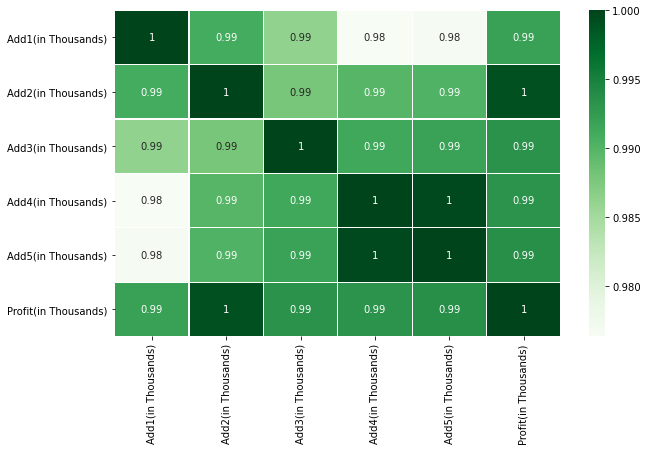

In [9]:
plt.subplots(figsize=(10,6))
sns.heatmap(corrmatr,annot=True,linewidth=0.1,cmap='Greens')

In [10]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [11]:
y = data['Profit(in Thousands)']
X = data.drop(['Profit(in Thousands)','Date'],axis=1)

In [12]:
X.shape

(205, 5)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [14]:
from sklearn import linear_model
lin = linear_model.LinearRegression()
model = lin.fit(X_train,y_train)
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 8.11273293080854e-25


In [16]:
model.intercept_

0.0

In [17]:
model.coef_

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

#### ●The regression model for the given data is found. 25% of the data is assigned for testing and remaining 75% for training.
#### ●Mean squared error of the predicted model is 8.11273293080854e-25, ie; its approximately 0.
#### ●Intercept of the predicted model is  0.
#### ●Coefficients of the predicted model are (1.  , 12.38,  3.5 ,  1.  ,  0.9 ).

# 3-Prediction of profit generated by the company, if they wish to spend the following amount for advertisement

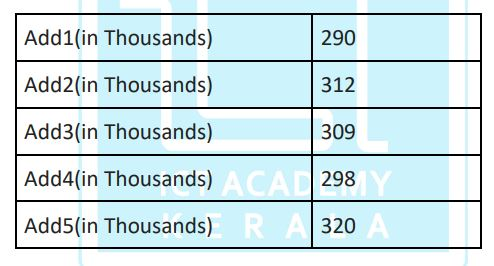

In [18]:
prof_pred = [[290,312,309,298,320]]
model.predict(prof_pred).item()

5820.0599999999995

### The profit generated by the company if they spent the above amounts for advertisement is 5820.06 thousand.